In [1]:
from bs4 import BeautifulSoup
import fileinput
import sys
import re
import csv
import requests

url = "www.federalreserve.gov/boarddocs/rptcongress/creditscore/overviewfigtables.htm"
r  = requests.get("https://" +url)
data = r.text
soup = BeautifulSoup(data)
soup

/Applications/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Applications/anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>FRB: Report to the Congress on Credit Scoring and Its Effects on the Availability and Affordability of Credit</title>
<link href="../rtc.css" rel="stylesheet" type="text/css"/>
<script type="text/javascript">
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','//www.google-analytics.com/analytics.js','ga');
  ga('create', 'UA-35121701-1', 'federalreserve.gov', {'cookieExpires': 0});
  ga('set', 'anonymizeIp', true);
  ga('send', 'pageview');
</script></head>
<body>
<div id="container">
<a href="#skip_target"><img alt="skip t

In [2]:

def cell_text(cell):
    return " ".join(cell.stripped_strings)

# soup = BeautifulSoup('\n'.join(fileinput.input()), 'lxml')

for table in soup.find_all('table'):
    title = table.find('span', { 'class' : 'tablehead' }).getText()
    subhead = table.find('span', { 'class' : 'tablesubheadsmall' }).getText()
    print(title, subhead)
    fname = (title + ' - '+subhead).replace(' ', '_') + '.csv'
    fname = fname.replace(':', '-')
    with open(fname, 'w') as outfile:
        output = csv.writer(outfile)

        for row in table.find_all('tr'):
            col = map(cell_text, row.find_all(re.compile('t[dh]')))
            output.writerow(col)


Figure O--1. Mean TransRisk Score, by Demographic Group Race or ethnicity (SSA data)
Figure O--1. Mean TransRisk Score, by Demographic Group Sex
Figure O--1. Mean TransRisk Score, by Demographic Group Age (years)
Figure O--1. Mean TransRisk Score, by Demographic Group Marital status
Figure O--1. Mean TransRisk Score, by Demographic Group Income ratio of tract
Figure O--1. Mean TransRisk Score, by Demographic Group Minority percent of tract
Figure O--2. TransRisk Score: Cumulative Percentage, by Demographic Group Race or ethnicity (SSA data)
Figure O--2. TransRisk Score: Cumulative Percentage, by Demographic Group Race or ethnicity (location-based distribution)
Figure O--2. TransRisk Score: Cumulative Percentage, by Demographic Group Sex
Figure O--2. TransRisk Score: Cumulative Percentage, by Demographic Group Age (years)
Figure O--2. TransRisk Score: Cumulative Percentage, by Demographic Group Marital status
Figure O--2. TransRisk Score: Cumulative Percentage, by Demographic Group Inco

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as mlines

In [4]:
data = pd.read_csv("ficoscores.csv")

In [5]:
data2 = pd.read_csv("ficoscores2.csv")

In [6]:
#only for white race:
white_non_default = data[["Score", "Non- Hispanic white (Good)"]]
white_default = data[["Score","Non- Hispanic white (Bad)"]]
black_non_default = data[["Score","Black (Good)"]]
black_default = data[["Score","Black (Bad)"]]
hispanic_non_default = data[["Score","Black (Bad).1"]]
hispanic_default = data[["Score","Hispanic (Bad)"]]
asian_non_default = data[["Score","Asian (Good)"]]
asian_default = data[["Score","Asian (Bad)"]]

In [7]:
def getGraph(dataset, metricName, graphType):
    i= 0
    x = []
    y = []
    while(i < 100.5):
        if(i == 72.5 or i == 77.5 or i == 92.5):
            i = (i + 0.5)
        curr_race_non_default = dataset[dataset["Score"] >= i][metricName].sum()
        total_race_non_default = dataset[metricName].sum()
        yVal = curr_race_non_default / total_race_non_default
        x.append(i)
        y.append(yVal)
        i = (i + 0.5)
        plt.plot(x, y, graphType, label=metricName)


In [8]:
def getGraphYEqualsZero(dataset, metricName, graphType):
    i= 0
    x = []
    y = []
    while(i < 100.5):
        if(i == 72.5 or i == 77.5 or i == 92.5):
            i = (i + 0.5)
        curr_race_num = dataset[dataset["Score"] >= i][metricName].sum()
        total_race_num = dataset[metricName].sum()
        yVal = (total_race_num - curr_race_num) / total_race_num
        x.append(i)
        y.append(yVal)
        i = (i + 0.5)
        plt.plot(x, y, graphType)

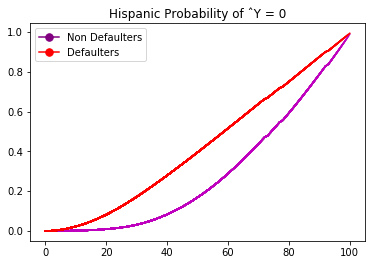

In [9]:
getGraphYEqualsZero(hispanic_non_default, "Black (Bad).1", 'm-')
getGraphYEqualsZero(hispanic_default, "Hispanic (Bad)", 'r-')
plt.title("Hispanic Probability of ˆY = 0")

purple_line = mlines.Line2D([], [], color='purple', marker='.',
                          markersize=15, label='Non Defaulters')
red_line = mlines.Line2D([], [], color='red', marker='.',
                          markersize=15, label='Defaulters')
plt.legend(handles=[purple_line, red_line])

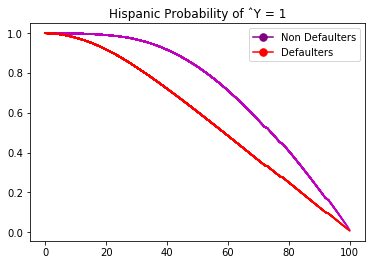

In [10]:
getGraph(hispanic_non_default, "Black (Bad).1", 'm-')
getGraph(hispanic_default, "Hispanic (Bad)", 'r-')
plt.title("Hispanic Probability of ˆY = 1")

purple_line = mlines.Line2D([], [], color='purple', marker='.',
                          markersize=15, label='Non Defaulters')
red_line = mlines.Line2D([], [], color='red', marker='.',
                          markersize=15, label='Defaulters')
plt.legend(handles=[purple_line, red_line])

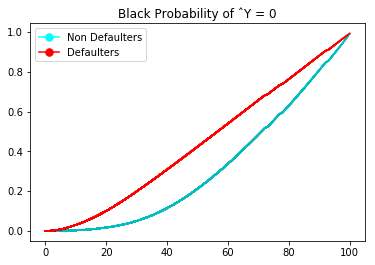

In [11]:
getGraphYEqualsZero(black_non_default, "Black (Good)", 'c-')
getGraphYEqualsZero(black_default, "Black (Bad)", 'r-')
plt.title("Black Probability of ˆY = 0")

purple_line = mlines.Line2D([], [], color='cyan', marker='.',
                          markersize=15, label='Non Defaulters')
red_line = mlines.Line2D([], [], color='red', marker='.',
                          markersize=15, label='Defaulters')
plt.legend(handles=[purple_line, red_line])

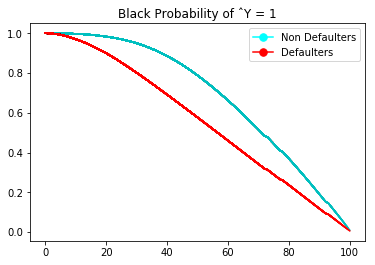

In [12]:
getGraph(black_non_default, "Black (Good)", 'c-')
getGraph(black_default, "Black (Bad)", 'r-')
plt.title("Black Probability of ˆY = 1")

purple_line = mlines.Line2D([], [], color='cyan', marker='.',
                          markersize=15, label='Non Defaulters')
red_line = mlines.Line2D([], [], color='red', marker='.',
                          markersize=15, label='Defaulters')
plt.legend(handles=[purple_line, red_line])

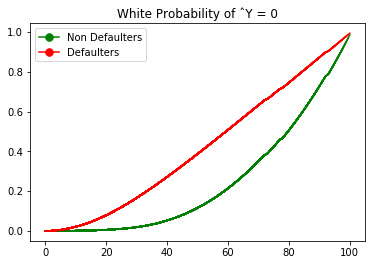

In [13]:
getGraphYEqualsZero(white_non_default, "Non- Hispanic white (Good)", 'g-')
getGraphYEqualsZero(white_default, "Non- Hispanic white (Bad)", 'r-')
plt.title("White Probability of ˆY = 0")

purple_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='Non Defaulters')
red_line = mlines.Line2D([], [], color='red', marker='.',
                          markersize=15, label='Defaulters')
plt.legend(handles=[purple_line, red_line])

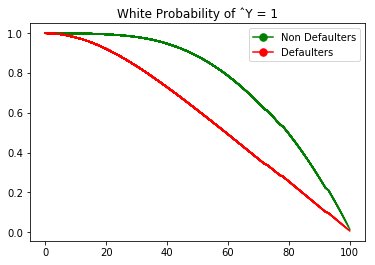

In [14]:
getGraph(white_non_default, "Non- Hispanic white (Good)", 'g-')
getGraph(white_default, "Non- Hispanic white (Bad)", 'r-')
plt.title("White Probability of ˆY = 1")

purple_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='Non Defaulters')
red_line = mlines.Line2D([], [], color='red', marker='.',
                          markersize=15, label='Defaulters')
plt.legend(handles=[purple_line, red_line])

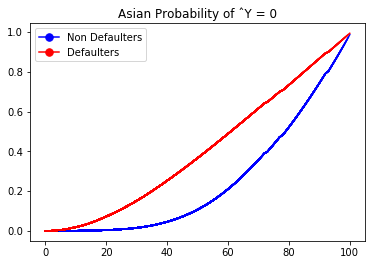

In [15]:
getGraphYEqualsZero(asian_non_default, "Asian (Good)", 'b-')
getGraphYEqualsZero(asian_default, "Asian (Bad)", 'r-')
plt.title("Asian Probability of ˆY = 0")

purple_line = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=15, label='Non Defaulters')
red_line = mlines.Line2D([], [], color='red', marker='.',
                          markersize=15, label='Defaulters')
plt.legend(handles=[purple_line, red_line])

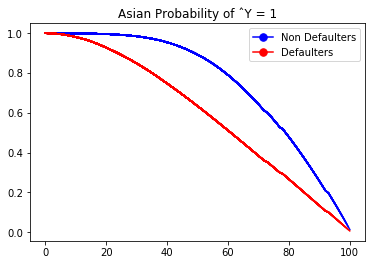

In [16]:
getGraph(asian_non_default, "Asian (Good)", 'b-')
getGraph(asian_default, "Asian (Bad)", 'r-')
plt.title("Asian Probability of ˆY = 1")

purple_line = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=15, label='Non Defaulters')
red_line = mlines.Line2D([], [], color='red', marker='.',
                          markersize=15, label='Defaulters')
plt.legend(handles=[purple_line, red_line])

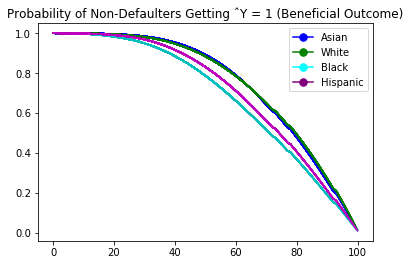

In [17]:
getGraph(asian_non_default, "Asian (Good)", 'b-')
getGraph(white_non_default, "Non- Hispanic white (Good)", 'g-')
getGraph(black_non_default, "Black (Good)", 'c-')
getGraph(hispanic_non_default, "Black (Bad).1", 'm-')
plt.title("Probability of Non-Defaulters Getting ˆY = 1 (Beneficial Outcome)" )


blue_line = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=15, label='Asian')
green_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='White')
cyan_line = mlines.Line2D([], [], color='cyan', marker='.',
                          markersize=15, label='Black')
purple_line = mlines.Line2D([], [], color='purple', marker='.',
                          markersize=15, label='Hispanic')

plt.legend(handles=[blue_line, green_line, cyan_line, purple_line])

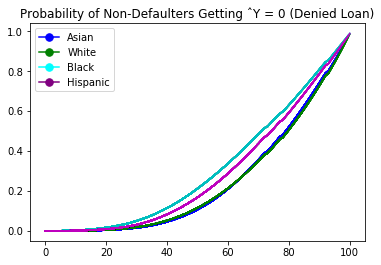

In [18]:
getGraphYEqualsZero(asian_non_default, "Asian (Good)", 'b-')
getGraphYEqualsZero(white_non_default, "Non- Hispanic white (Good)", 'g-')
getGraphYEqualsZero(black_non_default, "Black (Good)", 'c-')
getGraphYEqualsZero(hispanic_non_default, "Black (Bad).1", 'm-')
plt.title("Probability of Non-Defaulters Getting ˆY = 0 (Denied Loan)" )


blue_line = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=15, label='Asian')
green_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='White')
cyan_line = mlines.Line2D([], [], color='cyan', marker='.',
                          markersize=15, label='Black')
purple_line = mlines.Line2D([], [], color='purple', marker='.',
                          markersize=15, label='Hispanic')

plt.legend(handles=[blue_line, green_line, cyan_line, purple_line])

In [19]:
# X Axis is the FICO Score Percentile
# Y Axis is the probabability of obtaining either ˆY = 0 or ˆY = 1
# Threshold that maximizes profit is the score where 82% of people don't default

In [21]:
#same as graphing functions, it just returns data as a pandas df instead of a graphable mathplotlib element
def getAllProbabilities(dataset, metricName):
    i= 0
    x = []
    y = []
    while(i < 100.5):
        if(i == 72.5 or i == 77.5 or i == 92.5):
            i = (i + 0.5)
        curr_race_non_default = dataset[dataset["Score"] >= i][metricName].sum()
        total_race_non_default = dataset[metricName].sum()
        yVal = curr_race_non_default / total_race_non_default
        x.append(i)
        y.append(yVal)
        i = (i + 0.5)
    return pd.DataFrame(
        {'Score': x,
         'Probability of Beneficial Outcome': y
    })

## Max Profit Classifier ##

In [67]:
def getMaxProfit(identifier, dataset, raceMetric, lowerBound, upperBound):
    allProbabilities = getAllProbabilities(dataset, raceMetric)
    above82 = allProbabilities[allProbabilities["Probability of Beneficial Outcome"] > lowerBound]
    whiteMaximizedProfit = above82[above82["Probability of Beneficial Outcome"] < upperBound]
    return (identifier, whiteMaximizedProfit["Score"].values[0])

In [68]:
# Threshold is different for each group
# For each group, pick the threshold that maximizes proft
# This is the score at which 82% of the people do not default (by this do they mean 82% of people who
# don't default get a loan?)

#lower threshold = more false negatives
#pool defaulters and non defaulters together into one

#QUESTION : How would I do this with my current data when I'm looking at people who default entirely separate
#from people who don't default? I went with the assumtion that max profit is 82% of people who don't default get a loan.

maxWhiteProfitScore = getMaxProfit("white", white_non_default, 'Non- Hispanic white (Good)', 0.82, 0.825)
maxBlackProfitScore = getMaxProfit("black", black_non_default, 'Black (Good)', 0.82, 0.825)
maxAsianProfitScore = getMaxProfit("asian", asian_non_default, 'Asian (Good)', 0.80, 0.83)
maxHispanicProfitScore = getMaxProfit("hispanic", hispanic_non_default, 'Black (Bad).1', 0.82, 0.825)

maxWhiteProfitScore, maxBlackProfitScore, maxAsianProfitScore, maxHispanicProfitScore

(('white', 56.5), ('black', 47.0), ('asian', 57.0), ('hispanic', 51.0))

## Race Blind Classifier ##

In [97]:
# Threshold must be the same for each group
# Pick single threshold where 82% of people do not default overall

#I think this is wrong because all it did was find the probabilities of each race at the threshold of 82.5
#what I am trying to do is somehow concatenate all of the data points so that I can determine what percentage
#of people overall are not getting loans out of the non-defaulting population, then I look at where the total
#is 0.82% and choose the score there.

whiteAll = getAllProbabilities(white_non_default, 'Non- Hispanic white (Good)')
blackAll = getAllProbabilities(black_non_default, 'Black (Good)')
asianAll = getAllProbabilities(asian_non_default, 'Asian (Good)')
hispanicAll = getAllProbabilities(hispanic_non_default, 'Black (Bad).1')

whiteBlack = pd.merge(blackAll,whiteAll,on='Score')
asianHispanic = pd.merge(asianAll, hispanicAll, on='Score')
finalResult = pd.merge(whiteBlack, asianHispanic, on='Score')
bestScoreForAll = finalResult[finalResult["Score"] == 82.5]
bestScoreForAll = bestScoreForAll.rename(index=str, columns={"Probability of Beneficial Outcome_x_x": "White", "Score": "Score", 
                                          "Probability of Beneficial Outcome_y_x": "Asian",
                                           "Probability of Beneficial Outcome_x_y": "Black",
                                           "Probability of Beneficial Outcome_y_y": "Hispanic"
                                          })
bestScoreForAll


,White,Score,Asian,Black,Hispanic
163,0.326361,82.5,0.443692,0.426837,0.360742


## Demographic Parity Classifier ##

In [26]:
# Threshold is different for each group
# Fraction of group members that recieve ˆY = 1 is the same for all groups

#QUESTION : is there a specific fraction I am supposed to choose? This seems similar to Max Profit Classifier


##  Equal Opportunity ##

In [27]:
# Threshold is different for each group
# Fraction of NON-DEFAULTING group members that recieve ˆY = 1 is the same for all groups

#QUESTION: again is there a specific fraction for this and for equalized odds as well?


## Equalized Odds ##

In [28]:
# Fraction of Defaulters that recieve ˆY = 1 (beneficial outcome) must be same for every group
# Fraction of Non-Defaulters that recieve ˆY = 1 must be same for every group too
# Can pick TWO thresholds per group: 
# above both thresholds are people who qualify
# between both thresholds people qualify with a certain probability

# How do I pick the thresholds? Randomization? How do I determine the probability factor between the thresholds?
